<a href="https://colab.research.google.com/github/VicentePina7210/DataMiningCleaningExercise/blob/main/Image_Classification_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification Exercise

Implement two algorithms to classify images of handwritten digits 1-10

In [12]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


# Load mnist dataset
mnist = fetch_openml('mnist_784', as_frame=False, cache=False)

(784,)


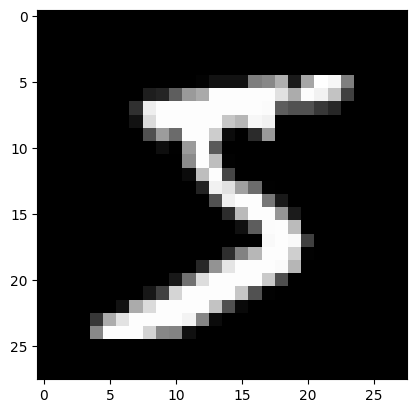

In [13]:
# Example image
print(mnist.data[0].shape)
plt.imshow(mnist.data[0].reshape(28, 28), cmap='gray')
plt.show()

In [14]:

x = mnist.data.astype('float32')[:1000]
y = mnist.target.astype('int64')[:1000]
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42
)

In [33]:
# Custom implementation for

def image_dist(x1, x2):
    img1 = x1.reshape(28, 28)
    img2 = x2.reshape(28, 28)

    # Divide each image into four 14x14 quadrants
    quadrants1 = [
        img1[:14, :14],  # Top-left
        img1[:14, 14:],  # Top-right
        img1[14:, :14],  # Bottom-left
        img1[14:, 14:]   # Bottom-right
    ]

    quadrants2 = [
        img2[:14, :14],  # Top-left
        img2[:14, 14:],  # Top-right
        img2[14:, :14],  # Bottom-left
        img2[14:, 14:]   # Bottom-right
    ]

    # Initialize total distance
    total_distance = 0

    # Compute Manhattan distance for each quadrant
    for q1, q2 in zip(quadrants1, quadrants2):
        total_distance += np.sum(np.abs(q1 - q2))

    return total_distance

In [34]:
# Implement KNN from sklearn and print performance
# (your code here)
for i in range(4,10):
    knn = KNeighborsClassifier(n_neighbors = i, metric = image_dist)
    knn.fit(x_train, y_train)

    y_pred = knn.predict(x_test)

    print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.88      0.95      0.91        22
           1       0.63      1.00      0.77        24
           2       0.85      0.68      0.76        25
           3       0.93      0.87      0.90        31
           4       0.80      0.84      0.82        19
           5       0.95      0.87      0.91        23
           6       0.93      0.90      0.91        29
           7       0.81      0.78      0.79        32
           8       0.94      0.85      0.89        20
           9       0.90      0.76      0.83        25

    accuracy                           0.85       250
   macro avg       0.86      0.85      0.85       250
weighted avg       0.86      0.85      0.85       250

              precision    recall  f1-score   support

           0       0.84      0.95      0.89        22
           1       0.62      1.00      0.76        24
           2       0.89      0.64      0.74        25
           3       0.96 

In [17]:
# Implement logistic regression from sklearn and print performance
# (your code here)
log_reg = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=1000,
)
log_reg.fit(x_train, y_train)

y_pred = log_reg.predict(x_test)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.88      1.00      0.94        22
           1       0.85      0.96      0.90        24
           2       0.74      0.92      0.82        25
           3       0.82      0.90      0.86        31
           4       0.85      0.89      0.87        19
           5       0.94      0.65      0.77        23
           6       0.93      0.93      0.93        29
           7       0.90      0.84      0.87        32
           8       0.84      0.80      0.82        20
           9       0.95      0.72      0.82        25

    accuracy                           0.86       250
   macro avg       0.87      0.86      0.86       250
weighted avg       0.87      0.86      0.86       250

[[22  0  0  0  0  0  0  0  0  0]
 [ 0 23  1  0  0  0  0  0  0  0]
 [ 1  0 23  0  0  0  1  0  0  0]
 [ 0  0  2 28  1  0  0  0  0  0]
 [ 0  0  0  0 17  0  1  0  1  0]
 [ 1  0  1  4  0 15  0  0  2  0]
 [ 1  1  0  0  0  0 27  0  0  0]
 [ 0  2  1

In [ ]:
# Implement neural network (multi-layer perceptron) from sklearn and print performance
# (your code here)

In [ ]:
# Compare the performance of each model, which does well and why do you think each model performed as well or as poorly as it did
# (free response)

In [ ]:
# Implement KNN with a custom distance function and print performance
# (your code here)


# **Reflection**
The data set we were given was a very easy to work with dataset that only consisted of a trinary sequence of numbers in an array. KNN did a great job with image classfication and prediction with an average result of about 90 percent or so based on each value k. The custom implementation did slightly worse, the custom function to replace the metric for kneighborsclassification less susceptible to changes and distortions in photos because it splits each image into four quadrants and then calculates the difference in distance.
